<a href="https://colab.research.google.com/github/jakubtwalczak/dsbootcampudemy/blob/main/7_Uczenie_g%C5%82%C4%99bokie/4_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tensorflow Hub to repozytorium wstępnie wytrenowanych modeli uczenia maszynowego, pozwalająca na wielokrotne i darmowe wykorzystywanie modułów tychże modeli.

Technika transfer learningu umożliwia nam skorzystanie z wcześniej wyuczonych modeli uczenia maszynowego na bardzo dużych zbiorach danych z zaawansowaną architekturą. Pozwala to zaoszczędzić czas na rozwijanie własnych modeli lub moc obliczeniową wykorzystywaną podczas trenowania.

Transfer learning:
 - pozwala na trenowanie modelu z małym zbiorem danych,
 - pozwala poprawić generalizację modeli,
 - przyspiesza proces trenowania modeli,
 - umożliwia łatwiejsze stosowanie modeli osobom chcącym poznać możliwości ich implementacji.

UWAGA: Żeby było możliwe właściwe przejście przez tę lekcję, należy zainstalować wcześniejszą wersję Tensorflow, w przeciwnym wypadku pokaże nam się błąd:

ValueError: Only instances of keras.Layer can be added to a Sequential model. Received: <tensorflow_hub.keras_layer.KerasLayer object at 0x7d62108221d0> (of type <class 'tensorflow_hub.keras_layer.KerasLayer'>)

In [1]:
!pip install tensorflow==2.8.0

In [2]:
import numpy as np
import PIL.Image as Image
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers
import matplotlib.pyplot as plt

Model wczytujemy ze ścieżki dostępu. Sam model może być umieszczony jako osobna warstwa z biblioteki Tensorflow_Hub (klasa **KerasLayer**). Podajemy również jako parametr rozmiar danych wejściowych.

In [3]:
classifier_url ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"

IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer(classifier_url, input_shape=IMAGE_SHAPE+(3,), trainable=False)
])

Ładujemy etykiety zawierające klasy dot. załadowanego modelu. Znajdują się one w storage'u Google.

In [4]:
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())
imagenet_labels

array(['background', 'tench', 'goldfish', ..., 'bolete', 'ear',
       'toilet tissue'], dtype='<U30')

Ładujemy plik z dysku dzięki funkcji **upload** z narzędzi Google Colab. Zobaczymy również, jak to zdjęcie wygląda.

In [5]:
from google.colab import files
uploaded = files.upload()

Saving Suczka1.jpg to Suczka1.jpg


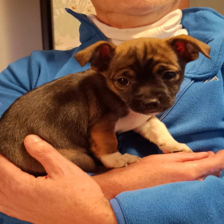

In [6]:
filename = list(uploaded.keys())[0]
img = Image.open(filename).resize(IMAGE_SHAPE)
img

Teraz przygotowujemy obraz, aby wrzucić go do załadowanego modelu, a następnie dokonujemy predykcji.

In [7]:
img_arr = np.array(img) / 255.0
img_arr = np.expand_dims(img_arr, axis=0)
result = classifier.predict(img_arr)
predicted_class = np.argmax(result[0], axis=-1)
predicted_class_name = imagenet_labels[predicted_class]
predicted_class_name

'Chihuahua'

Na końcu wyświetlamy zdjęcie z zapisaną predykcją.

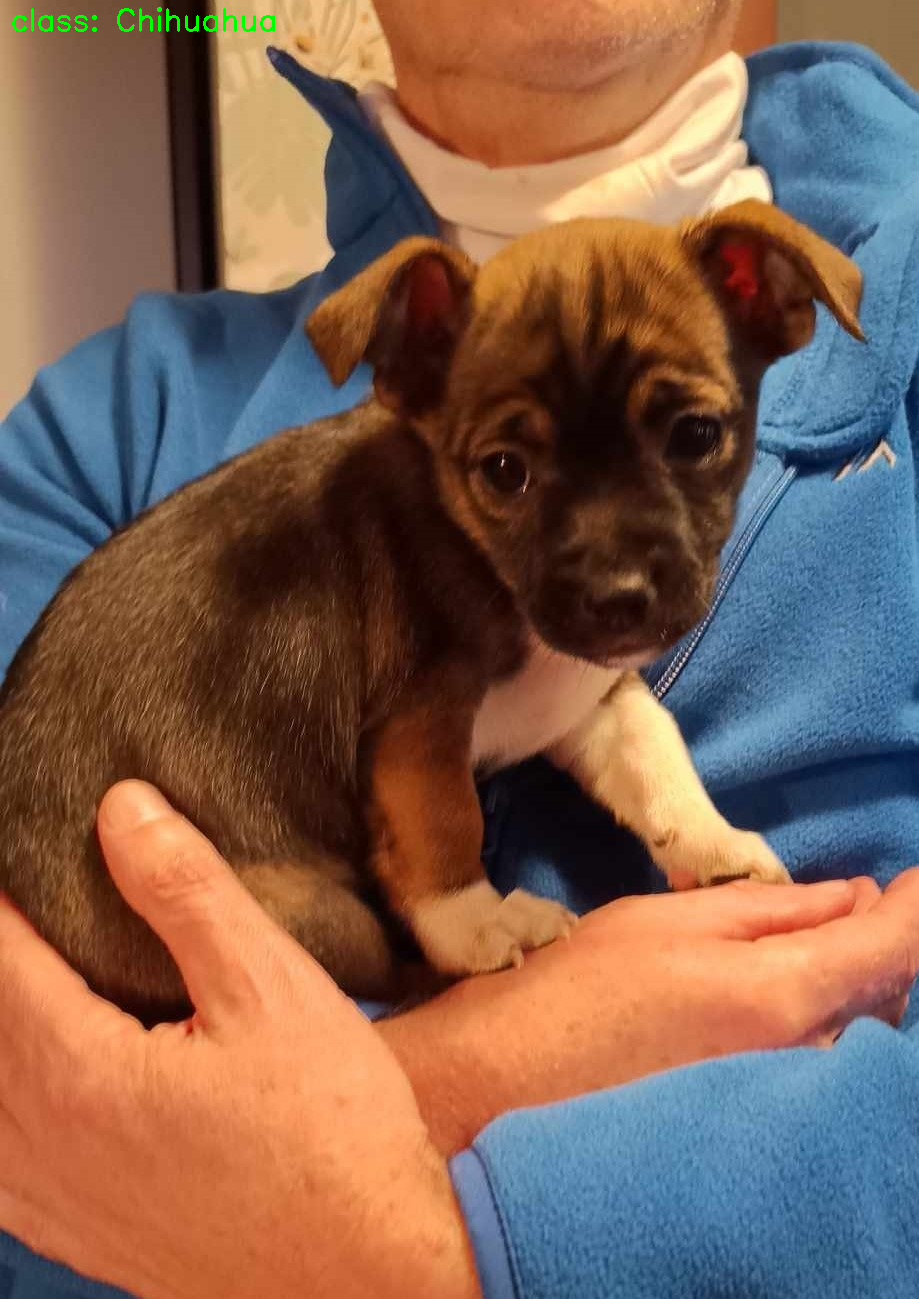

In [8]:
from google.colab.patches import cv2_imshow
import cv2

img = cv2.imread(filename)
text = f'class: {predicted_class_name}'
img = cv2.putText(img=img, text=text, org=(10, 30), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(0, 255, 0), thickness=2)
cv2_imshow(img)